This is the Jupyter notebook containing codes from the Gaze data visualizations folder of the GazeVisual-Lib repository.

This program eccentricity.py plots 2D distribution of gaze errors as a function of visual angles or eccentricity. Gaze error is plotted as function of gaze yaw (X) and pitch (Y) values. For implementation of this code , data from yaw, pitch, gaze error columns of the CSV file named user_data_proc.csv are used


160.635122709


Text(0.5,1,'Error vs visual angles')

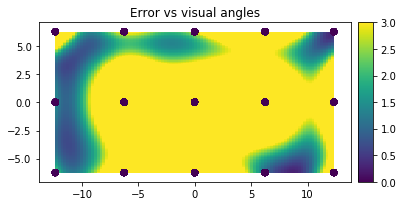

In [4]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D


gt_yaw=[]
gt_pitch=[]
gaze_er=[]

with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Gaze data visualizations/user_data_proc.csv','r') as csvfile:   
    datavals = csv.reader(csvfile, delimiter=',')
    datavals.next()
    for r1 in datavals:
        gt_yaw.append(float(r1[9]))   #Load gaze yaw data
        gt_pitch.append(float(r1[11])) #Load gaze pitch data
        gaze_er.append(float(r1[15]))   #Load gaze angle data

        
z= gaze_er
print max(z)
xi = np.linspace(min(gt_yaw),max(gt_yaw), 100)
yi= np.linspace(min(gt_pitch), max(gt_pitch), 100)

rbf = interpolate.interp2d(gt_yaw, gt_pitch, gaze_er, kind='cubic')
zi = rbf(xi, yi)

g4 = plt.figure(1)
ax = plt.gca()
im= ax.imshow(zi, vmin=0, vmax=3, origin='lower',
           extent=[min(gt_yaw), max(gt_yaw), min(gt_pitch), max(gt_pitch)])
plt.scatter(gt_yaw, gt_pitch, c=z)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) 
plt.colorbar(im, cax=cax)
ax.set_title('Error vs visual angles')


This program 3D_plot.py plots the 3D distribution of gaze error values (in degrees) over the display screen XY dimensions(in pixels). For implementation of this code , the CSV file named user_data_proc.csv is used

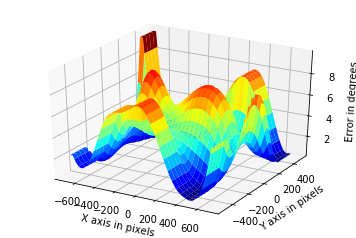

In [5]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from matplotlib import cm
from scipy import interpolate
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D

gt_x=[]
gt_y=[]
gaze_err=[]

with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Gaze data visualizations/user_data_proc.csv','r') as csvfile:   
    datavals = csv.reader(csvfile, delimiter=',')
    datavals.next()
    for r1 in datavals:
        gaze_err.append(float(r1[15]))   #Load gaze error data
        gt_x.append(float(r1[1]))        #Load ground truth XY coordinates
        gt_y.append(float(r1[2]))



gz_err= signal.medfilt(gaze_err,41)
z = np.array(gaze_err)
f = interpolate.interp2d(gt_x, gt_y, z, kind='cubic')

xnew = np.arange(-700, 700)
ynew = np.arange(-500, 500)
znew = f(xnew, ynew)
X, Y = np.meshgrid(xnew, ynew)
Z = znew.reshape(X.shape)

######################## Creating 3D plot######################################
g4 = plt.figure(4)
ax = g4.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=40, cstride=40,cmap=cm.jet)
ax.set_xlabel('X axis in pixels')
ax.set_ylabel('Y axis in pixels')
ax.set_zlabel('Error in degrees')
plt.show()


This program 3D_histogram.py plots stacked 3D gaze error distributions using data from two or more data columns (e.g. from different eye trackers or experiments in a single plot, for comparison of data characteristics from two or more datasets.
For implementation of this code , the CSV file named user_data_proc.csv is used. Data from yaw, pitch, gaze angle column values are used as an example.

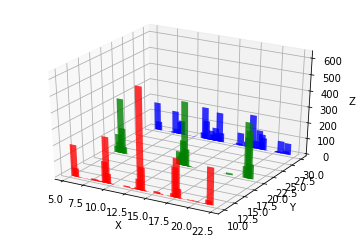

In [6]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import signal

gaze_yaw=[]
gaze_pitch=[]
gaze_ang=[]

with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Gaze data visualizations/user_data_proc.csv','r') as csvfile:   
    datavals = csv.reader(csvfile, delimiter=',')
    datavals.next()
    for r1 in datavals:
        gaze_yaw.append(float(r1[10]))   #Load gaze yaw data
        gaze_pitch.append(float(r1[12])) #Load gaze pitch data
        gaze_ang.append(float(r1[14]))   #Load gaze angle data


gaze_ang= signal.medfilt(gaze_ang,41)
gaze_pitch = signal.medfilt(gaze_pitch,41)
gaze_yaw= signal.medfilt(gaze_yaw,41)

######################### Plotting histograms #################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 50
hist1, bins = np.histogram(gaze_yaw, bins=100)
hist2, bins = np.histogram(gaze_pitch, bins=100)
hist3, bins = np.histogram(gaze_ang, bins=100)
xs = (bins[:-1] + bins[1:])/2

ax.bar(xs, hist1, zs=10, zdir='y', color='r', alpha=0.8)
ax.bar(xs, hist2, zs=20, zdir='y', color='g', alpha=0.8)
ax.bar(xs, hist3, zs=30, zdir='y', color='b', alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
